## Brazilian E-Commerce Data

### An analysis of E-Commerce data from Olist

the data can be found on Kaggle at [this link](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

<img src="data_schema.png" width=750>

### Note: This schema does not include the Product Categories dataset

## Step 1) Import Libraries and Data

In [278]:
import pandas as pd
import glob
import os
import datetime as dt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns

In [225]:
path = os.getcwd()
csv_files = glob.glob(path + "/*.csv")

csv_files

['/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_sellers_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/product_category_name_translation.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_orders_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_items_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_customers_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_geolocation_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_payments_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_reviews_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_products_dataset.csv']

In [226]:
df_list = [pd.read_csv(filename, index_col=None, header=0) for filename in csv_files]
df_list

[                             seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paulo          

In [227]:
sellers_df = df_list[0]
prod_cat_df = df_list[1]
orders_df = df_list[2]
items_df = df_list[3]
customers_df = df_list[4]
geolocation_df = df_list[5]
payments_df = df_list[6]
reviews_df = df_list[7]
products_df = df_list[8]

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>By importing the CSV files to a list, we're able to assign each one to a data frame using list indices</li>
</div>


    



## Step 2) Examine Datasets and Feature Engineering

In [228]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [229]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [230]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [231]:
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].astype('str')
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].apply(lambda x: x.zfill(5))

In [232]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [233]:
cap_seller_city = sellers_df['seller_city'].str.title()
sellers_df['seller_city_state'] = cap_seller_city + ', ' + sellers_df['seller_state']
sellers_df['seller_city'] = sellers_df['seller_city'].str.title()
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_city_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,"Campinas, SP"
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP,"Mogi Guacu, SP"
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ,"Rio De Janeiro, RJ"
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,Sao Paulo,SP,"Sao Paulo, SP"
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP,"Braganca Paulista, SP"
...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Sarandi,PR,"Sarandi, PR"
3091,f8201cab383e484733266d1906e2fdfa,88137,Palhoca,SC,"Palhoca, SC"
3092,74871d19219c7d518d0090283e03c137,04650,Sao Paulo,SP,"Sao Paulo, SP"
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Pelotas,RS,"Pelotas, RS"


In [234]:
sellers_df.duplicated().sum()

0

In [235]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_city_state         0
dtype: int64

In [236]:
sellers_df['seller_city_state'].nunique()

636

In [237]:
sellers_df['seller_state'].nunique()

23

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Changed Zip Code to a string and added leading zeroes.</li>
    <li>Capitalized city names.</li>
    <li>Created a new column that combined the city and state and capitalized the city name.</li>
</div>


    



<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Sellers come from all over Brazil including 636 cities from 23 states.</li>
</div>


    



In [238]:
prod_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [239]:
prod_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [240]:
cap_product = prod_cat_df['product_category_name_english'].str.title()
prod_cat_df['category_name_eng'] = cap_product
prod_cat_df.drop(prod_cat_df.columns[1], axis=1, inplace=True)
prod_cat_df

,product_category_name,category_name_eng
0,beleza_saude,Health_Beauty
1,informatica_acessorios,Computers_Accessories
2,automotivo,Auto
3,cama_mesa_banho,Bed_Bath_Table
4,moveis_decoracao,Furniture_Decor
...,...,...
66,flores,Flowers
67,artes_e_artesanato,Arts_And_Craftmanship
68,fraldas_higiene,Diapers_And_Hygiene
69,fashion_roupa_infanto_juvenil,Fashion_Childrens_Clothes


In [241]:
prod_cat_df.drop(columns='product_category_name', inplace=True)

In [242]:
prod_cat_df.rename(columns={'category_name_eng':'category_name'}, inplace=True)

In [243]:
prod_cat_df.head()

,category_name
0,Health_Beauty
1,Computers_Accessories
2,Auto
3,Bed_Bath_Table
4,Furniture_Decor


In [244]:
prod_cat_df.duplicated().sum()

0

In [245]:
prod_cat_df.isna().sum()

category_name    0
dtype: int64

In [246]:
prod_cat_df['category_name'].nunique()

71

In [247]:
sorted(prod_cat_df['category_name'].unique())

['Agro_Industry_And_Commerce',
 'Air_Conditioning',
 'Art',
 'Arts_And_Craftmanship',
 'Audio',
 'Auto',
 'Baby',
 'Bed_Bath_Table',
 'Books_General_Interest',
 'Books_Imported',
 'Books_Technical',
 'Cds_Dvds_Musicals',
 'Christmas_Supplies',
 'Cine_Photo',
 'Computers',
 'Computers_Accessories',
 'Consoles_Games',
 'Construction_Tools_Construction',
 'Construction_Tools_Lights',
 'Construction_Tools_Safety',
 'Cool_Stuff',
 'Costruction_Tools_Garden',
 'Costruction_Tools_Tools',
 'Diapers_And_Hygiene',
 'Drinks',
 'Dvds_Blu_Ray',
 'Electronics',
 'Fashio_Female_Clothing',
 'Fashion_Bags_Accessories',
 'Fashion_Childrens_Clothes',
 'Fashion_Male_Clothing',
 'Fashion_Shoes',
 'Fashion_Sport',
 'Fashion_Underwear_Beach',
 'Fixed_Telephony',
 'Flowers',
 'Food',
 'Food_Drink',
 'Furniture_Bedroom',
 'Furniture_Decor',
 'Furniture_Living_Room',
 'Furniture_Mattress_And_Upholstery',
 'Garden_Tools',
 'Health_Beauty',
 'Home_Appliances',
 'Home_Appliances_2',
 'Home_Comfort_2',
 'Home_Confo

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Capitalized product categories</li>
    <li>Dropped the Portuguese names column and renamed the English names column</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Some of what appear to be the same categories are separated (e.g. Home_Appliances and Home_Appliances_2). We will examine those once we join the products and items datasets.</li>
</div>

In [248]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [249]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_approved'] = pd.to_datetime(orders_df['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders_df['delivered_to_carrier'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['delivered_to_customer'] = pd.to_datetime(orders_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['estimated_delivery_to_customer'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_month_year'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

In [250]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [251]:
cols = [4,5,6,7]
orders_df.drop(orders_df.columns[cols], axis=1, inplace=True)

In [252]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [253]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   order_id                        99441 non-null  object        
 1   customer_id                     99441 non-null  object        
 2   order_status                    99441 non-null  object        
 3   order_purchase_timestamp        99441 non-null  datetime64[ns]
 4   order_approved                  99281 non-null  datetime64[ns]
 5   delivered_to_carrier            97658 non-null  datetime64[ns]
 6   delivered_to_customer           96476 non-null  datetime64[ns]
 7   estimated_delivery_to_customer  99441 non-null  datetime64[ns]
 8   order_month_year                99441 non-null  period[M]     
dtypes: datetime64[ns](5), object(3), period[M](1)
memory usage: 6.8+ MB


In [254]:
orders_df.duplicated().sum()

0

In [255]:
orders_df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved                     160
delivered_to_carrier              1783
delivered_to_customer             2965
estimated_delivery_to_customer       0
order_month_year                     0
dtype: int64

In [256]:
#Review rows with no approved dates
unapproved = orders_df[orders_df['order_approved'].isna()]
unapproved.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,2018-08
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,2018-09
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,2017-03
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,2018-08
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,2017-05


In [257]:
#Checking most recent order purchase
orders_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [258]:
#Confirming the order status of orders where approved = Null
unapproved['order_status'].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

In [259]:
#Extract unapproved but delivered orders
unapproved_del = ((orders_df['order_approved'].isna()) & (orders_df['order_status'] == 'delivered'))
unapproved_del.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [260]:
#Update approved time for delivered orders to purchased time
orders_df.loc[unapproved_del, 'order_approved'] = orders_df.loc[unapproved_del, 'order_purchase_timestamp']
orders_df.loc[unapproved_del, :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-18 14:40:00,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,2017-02
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 12:45:31,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,2017-02
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 13:29:47,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,2017-02
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,2017-02
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,2017-02
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,2017-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,2017-02
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,2017-02
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,2017-01
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,2017-02


In [261]:
#Checking to see if created unapproved orders are recent
unapproved[unapproved['order_status'] == 'created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11,2017-12
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07,2018-02
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12,2017-11
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08,2017-12
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01,2017-11


In [262]:
unapproved[unapproved['order_status'] == 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,2018-08
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,2018-09
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,2017-03
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,2018-08
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,2017-05
...,...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25,2017-07
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16,2017-09
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,2018-08
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,2018-08


In [263]:
#Review rows with no carrier dates
no_carrier = orders_df[orders_df['delivered_to_carrier'].isna()]
no_carrier.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-11
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,2016-10


In [264]:
#Confirming the order status of rows without carrier dates
no_carrier['order_status'].value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

In [265]:
#Checking if either of the delivered orders have been delivered to a customer
no_carrier.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,2017-09
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,2017-05


In [266]:
#Checking to see if processing orders are recent
no_carrier.query("order_status == 'processing'").sort_values(by='order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,2016-10
53897,56eb381fff8db8d35134693062514084,b102a37db53345d7eb418649b096f8e8,processing,2016-10-09 12:34:53,2016-10-11 05:03:21,NaT,NaT,2016-12-30,2016-10
45181,255d951095fc26f86cc7a08b822b714a,4aa40fd3991ea64e9dead06fe15f021c,processing,2017-01-11 15:18:25,2017-01-11 15:30:11,NaT,NaT,2017-03-01,2017-01
85488,6ed4f19dc97f2a4b5d0f15651247dbca,6b7e649105e4c5388bd8c3c4e9efcff3,processing,2017-01-18 09:52:32,2017-01-18 10:05:11,NaT,NaT,2017-02-28,2017-01
31699,a68667474430fadbcfc1bfbb9e2adc0b,616fa20bdc978ccaf552b46fbc0567a5,processing,2017-01-18 20:48:59,2017-01-20 02:10:55,NaT,NaT,2017-03-06,2017-01
...,...,...,...,...,...,...,...,...,...
20069,57c432fd96e9d52639f048eb1b2a5b10,fdd0411bec46e2d9a15590016b897dc3,processing,2018-05-07 19:30:29,2018-05-09 04:31:31,NaT,NaT,2018-06-04,2018-05
15581,eb3c78fe8b35f52d4369d69d383fc212,263f9cd6ec31b2a2f80e4e26cb235335,processing,2018-05-07 22:40:38,2018-05-07 22:52:41,NaT,NaT,2018-06-04,2018-05
20012,8124e0a6295df5f9ce4377ca0a8e0c18,6e14fc1f239d4384a91b043639b2e3b7,processing,2018-05-08 15:27:57,2018-05-09 17:36:39,NaT,NaT,2018-06-05,2018-05
28651,83fc33b62b8c7c39e2258d081955143d,c6eb22e4e7b7e5b871c06250c3296ef9,processing,2018-05-15 20:00:48,2018-05-17 02:55:42,NaT,NaT,2018-05-30,2018-05


In [267]:
#Checking to see if created orders are recent
no_carrier.query("order_status == 'created'").sort_values(by='order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01,2017-11
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12,2017-11
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11,2017-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08,2017-12
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07,2018-02


In [268]:
delivered_no_carrier = ((orders_df['delivered_to_carrier'].isna()) & (orders_df['order_status'] == 'delivered'))

In [269]:
orders_df.loc[delivered_no_carrier, 'delivered_to_carrier'] = orders_df.loc[
    delivered_no_carrier, 'order_purchase_timestamp']
orders_df.loc[delivered_no_carrier,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-09-29 08:52:58,2017-11-20 19:44:47,2017-11-14,2017-09
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23,2017-05


In [270]:
#Review rows with no delivery dates
undelivered = orders_df[orders_df['delivered_to_customer'].isna()]
undelivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-01


In [271]:
#Confirming the order status of orders without delivery dates
undelivered['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [272]:
#Checking rows marked as delivered but with Null values for Delivered to Customer
undelivered.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,2017-11
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,2018-06
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,2018-07
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,2018-07
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,2018-07
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23,2017-05
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,2018-06
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,2018-06


In [273]:
#Computer average delivery time
avg_delivery_time = (orders_df['delivered_to_customer'] - orders_df['delivered_to_carrier']).mean()
avg_delivery_time

Timedelta('9 days 07:56:37.872558978')

In [274]:
#Extract delivered orders with no delivery date
delivered_no_date = (orders_df['delivered_to_customer'].isna()) & (orders_df['order_status'] == 'delivered')

In [275]:
#Impute delivered_to_customer time values with the average delivery time
orders_df.loc[delivered_no_date, 'delivered_to_customer'] = orders_df.loc[delivered_no_date, 
                                                                       'delivered_to_carrier'] + avg_delivery_time
orders_df.loc[delivered_no_date,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-10 02:09:00.872558978,2017-12-18,2017-11
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-04 16:01:37.872558978,2018-07-16,2018-06
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30,2018-07
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30,2018-07
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-12 17:24:37.872558978,2018-07-24,2018-07
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,2017-06-04 07:19:20.872558978,2017-06-23,2017-05
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-21 22:06:37.872558978,2018-06-26,2018-06
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-13 03:22:37.872558978,2018-07-19,2018-06


In [280]:
#Compute delivery duration in days and hours for all orders
orders_df['delivery_duration'] = (orders_df['delivered_to_customer'] - orders_df['delivered_to_carrier'])
orders_df['delivery_hours'] = orders_df['delivery_duration']/dt.timedelta(hours=1)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,delivery_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,6 days 01:30:13,145.50
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,12 days 00:56:45,288.95
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9 days 04:16:29,220.27
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11,9 days 10:48:43,226.81
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,1 days 22:30:28,46.51


In [283]:
orders_df['delivery_duration'].describe()

count                        96484
mean     9 days 07:56:37.872558978
std      8 days 18:15:34.261396153
min             -17 days +21:41:31
25%         4 days 02:24:34.500000
50%                7 days 02:23:48
75%        12 days 00:41:23.750000
max              205 days 04:35:00
Name: delivery_duration, dtype: object

In [284]:
orders_df['delivery_hours'].describe()

count   96484.00
mean      223.94
std       210.26
min      -386.31
25%        98.41
50%       170.40
75%       288.69
max      4924.58
Name: delivery_hours, dtype: float64

In [287]:
#Checking how many orders have a negative delivery time
orders_df.loc[orders_df['delivery_hours'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,delivery_hours
6437,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,2017-07,-3 days +02:34:58,-69.42
9553,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,2017-07,-2 days +21:05:10,-26.91
13487,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,2017-07,-2 days +18:51:26,-29.14
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,2017-07,-7 days +23:45:40,-144.24
19268,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31,2017-07,-1 days +19:48:59,-4.18
21338,8c78d01de3a9009e23d6877a7cc9be20,6cd7106899e59a1fbd0622d5f1efedf4,delivered,2016-10-08 15:36:50,2016-10-08 18:13:44,2016-10-26 11:41:53,2016-10-25 17:51:46,2016-11-30,2016-10,-1 days +06:09:53,-17.84
22520,b27af682321527a6349f1761eb3f360c,9859dd92e872dbaa60ca3cd5f0d7ad07,delivered,2017-06-14 20:17:04,2017-06-14 20:30:08,2017-06-27 14:51:54,2017-06-26 15:45:35,2017-07-14,2017-06,-1 days +00:53:41,-23.11
25393,1cc3ae63caffff2d6c3ee3e78e074acf,01c843a2c0600def0b7693dba47af460,delivered,2017-08-07 21:35:22,2017-08-08 21:45:15,2017-08-10 18:28:56,2017-08-10 18:05:38,2017-08-25,2017-08,-1 days +23:36:42,-0.39
25646,e37f11cae9985ca58f0b56f268720537,3947a361301f2ff0f3223159a0f2701c,delivered,2017-07-26 11:46:34,2017-07-27 10:10:16,2017-08-01 18:17:47,2017-07-31 17:49:56,2017-08-24,2017-07,-2 days +23:32:09,-24.46
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,63be4feff10a0b1d85f2cfbf10df9754,delivered,2017-07-30 19:32:23,2017-07-30 19:45:09,2017-08-09 18:18:43,2017-08-01 21:13:01,2017-08-18,2017-07,-8 days +02:54:18,-189.09


In [51]:
orders_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [52]:
orders_df['order_status'].nunique()

8

In [53]:
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Converted all delivery columns to datetime format and renamed columns.</li>
    <li>Dropped old columns.</li>
    <li>Created a period column of just the month and year.</li>
    <li>Imputed some values for delivery time.</li>
    <li>Created columns for delivery time in days and hours.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>There are eight options for order status.</li>
    <li>This will give us a lot to examine in terms of how long it takes customers to get their orders from purchase to delivery.</li>
    <li>UPDATE ALL THIS BULLJIVE LATER</li>
    </div>

In [54]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [55]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [56]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

In [57]:
items_df.duplicated().sum()

0

In [58]:
items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [59]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [60]:
items_df['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [61]:
items_df['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [288]:
items_df['order_item_id'].value_counts(normalize=True)

1    0.88
2    0.09
3    0.02
4    0.01
5    0.00
6    0.00
7    0.00
8    0.00
9    0.00
10   0.00
11   0.00
12   0.00
13   0.00
14   0.00
15   0.00
16   0.00
17   0.00
18   0.00
19   0.00
20   0.00
21   0.00
Name: order_item_id, dtype: float64

In [62]:
items_df['price'].describe()

count   112650.00
mean       120.65
std        183.63
min          0.85
25%         39.90
50%         74.99
75%        134.90
max       6735.00
Name: price, dtype: float64

In [289]:
items_df['price'].value_counts(bins=[0,10,100,1000,7000]).sort_index()

(-0.001, 10.0]       1269
(10.0, 100.0]       71068
(100.0, 1000.0]     39469
(1000.0, 7000.0]      844
Name: price, dtype: int64

In [64]:
items_df['freight_value'].describe()

count   112650.00
mean        19.99
std         15.81
min          0.00
25%         13.08
50%         16.26
75%         21.15
max        409.68
Name: freight_value, dtype: float64

In [291]:
items_df['freight_value'].value_counts(bins=[0,10,100,500]).sort_index()

(-0.001, 10.0]    15898
(10.0, 100.0]     96081
(100.0, 500.0]      671
Name: freight_value, dtype: int64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Converted shipping limit date to datetime format.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Most customers only purchase 1 item per order, but over 10% order 2 or more.</li>
    <li>Most items cost between \$10 and \$100 but some cost over \$1000 and as much as \$6735.</li>
    <li>Most freight costs are between 85&cent; and &dollar;100.</li>
</div>

In [66]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [67]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [68]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].apply(lambda x: x.zfill(5))

In [69]:
cap_cust_city = customers_df['customer_city'].str.title()
customers_df['customer_city_state'] = cap_cust_city + ', ' + customers_df['customer_state']
customers_df['customer_city'] = customers_df['customer_city'].str.title()
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_city_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,"Franca, SP"
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,Sao Bernardo Do Campo,SP,"Sao Bernardo Do Campo, SP"
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,Sao Paulo,SP,"Sao Paulo, SP"
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,Mogi Das Cruzes,SP,"Mogi Das Cruzes, SP"
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,"Campinas, SP"
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,Sao Paulo,SP,"Sao Paulo, SP"
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,Taboao Da Serra,SP,"Taboao Da Serra, SP"
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Fortaleza,CE,"Fortaleza, CE"
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Canoas,RS,"Canoas, RS"


In [70]:
customers_df['customer_zip_code_prefix'].nunique()

14994

In [71]:
customers_df['customer_city'].nunique()

4119

In [72]:
customers_df['customer_state'].nunique()

27

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Changed Zip Code to a string and added leading zeroes.</li>
    <li>Capitalized city names.</li>
    <li>Created a new column that combined the city and state and capitalized the city name.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Sellers come from all over Brazil including 4119 cities from 27 states.</li>
</div>


    



In [73]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [74]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,SP
1,1046,-23.55,-46.64,sao paulo,SP
2,1046,-23.55,-46.64,sao paulo,SP
3,1041,-23.54,-46.64,sao paulo,SP
4,1035,-23.54,-46.64,sao paulo,SP


In [75]:
geolocation_df['geolocation_zip_code_prefix'] = geolocation_df['geolocation_zip_code_prefix'].astype(
    str).apply(lambda x: x.zfill(5))

In [76]:
cap_geo_city = geolocation_df['geolocation_city'].str.title()
geolocation_df['geolocation_city_state'] = cap_geo_city + ', ' + geolocation_df['geolocation_state']
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].str.title()
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_city_state
0,01037,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
1,01046,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
2,01046,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
3,01041,-23.54,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
4,01035,-23.54,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
...,...,...,...,...,...,...
1000158,99950,-28.07,-52.01,Tapejara,RS,"Tapejara, RS"
1000159,99900,-27.88,-52.22,Getulio Vargas,RS,"Getulio Vargas, RS"
1000160,99950,-28.07,-52.01,Tapejara,RS,"Tapejara, RS"
1000161,99980,-28.39,-51.85,David Canabarro,RS,"David Canabarro, RS"


In [77]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
 5   geolocation_city_state       1000163 non-null  object 
dtypes: float64(2), object(4)
memory usage: 45.8+ MB


In [78]:
geolocation_df['geolocation_city_state'].nunique()

8463

In [79]:
geolocation_df['geolocation_zip_code_prefix'].nunique()

19015

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Changed Zip Code to a string and added leading zeroes.</li>
    <li>Capitalized city names.</li>
    <li>Created a new column that combined the city and state and capitalized the city name.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Olist's network comprises 8,463 cities across 19,015 zip codes.</li>
</div>


    



In [80]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [81]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [82]:
cap_payment = payments_df['payment_type'].str.title()
payments_df['payment_type'] = cap_payment
payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit_Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit_Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit_Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit_Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit_Card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,Boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,Credit_Card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,Credit_Card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,Credit_Card,5,369.54


In [83]:
payments_df['payment_sequential'].describe()

count   103886.00
mean         1.09
std          0.71
min          1.00
25%          1.00
50%          1.00
75%          1.00
max         29.00
Name: payment_sequential, dtype: float64

In [84]:
print(sorted(payments_df['payment_sequential'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [85]:
payments_df['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

In [86]:
payments_df['payment_sequential'].value_counts(bins=[0,5,10,20,30])

(-0.001, 5.0]    103428
(5.0, 10.0]         331
(10.0, 20.0]        109
(20.0, 30.0]         18
Name: payment_sequential, dtype: int64

In [87]:
payments_df['payment_type'].unique()

array(['Credit_Card', 'Boleto', 'Voucher', 'Debit_Card', 'Not_Defined'],
      dtype=object)

In [88]:
payments_df['payment_type'].value_counts()

Credit_Card    76795
Boleto         19784
Voucher         5775
Debit_Card      1529
Not_Defined        3
Name: payment_type, dtype: int64

In [89]:
payments_df['payment_type'].value_counts(normalize=True)

Credit_Card   0.74
Boleto        0.19
Voucher       0.06
Debit_Card    0.01
Not_Defined   0.00
Name: payment_type, dtype: float64

In [90]:
payments_df['payment_installments'].describe()

count   103886.00
mean         2.85
std          2.69
min          0.00
25%          1.00
50%          1.00
75%          4.00
max         24.00
Name: payment_installments, dtype: float64

In [91]:
print(sorted(payments_df['payment_installments'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24]


In [92]:
payments_df['payment_installments'].value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

In [93]:
payments_df['payment_installments'].value_counts(bins=[0,5,10,15,20,25]).sort_index()

(-0.001, 5.0]    87759
(5.0, 10.0]      15786
(10.0, 15.0]       261
(15.0, 20.0]        57
(20.0, 25.0]        23
Name: payment_installments, dtype: int64

In [94]:
payments_df['payment_installments'].value_counts(normalize=True)

1    0.51
2    0.12
3    0.10
4    0.07
10   0.05
5    0.05
8    0.04
6    0.04
7    0.02
9    0.01
12   0.00
15   0.00
18   0.00
11   0.00
24   0.00
20   0.00
13   0.00
14   0.00
17   0.00
16   0.00
21   0.00
0    0.00
22   0.00
23   0.00
Name: payment_installments, dtype: float64

In [95]:
payments_df['payment_value'].describe()

count   103886.00
mean       154.10
std        217.49
min          0.00
25%         56.79
50%        100.00
75%        171.84
max      13664.08
Name: payment_value, dtype: float64

In [96]:
payments_df['payment_value'].value_counts(bins=[0,10,100,1000,10000,14000]).sort_index()

(-0.001, 10.0]         1491
(10.0, 100.0]         50619
(100.0, 1000.0]       50626
(1000.0, 10000.0]      1149
(10000.0, 14000.0]        1
Name: payment_value, dtype: int64

In [97]:
payments_df['payment_value'].value_counts(bins=[0,10,100,1000,10000,14000], normalize=True).sort_index()

(-0.001, 10.0]       0.01
(10.0, 100.0]        0.49
(100.0, 1000.0]      0.49
(1000.0, 10000.0]    0.01
(10000.0, 14000.0]   0.00
Name: payment_value, dtype: float64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Capitalized payment type.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>The overwhelming majority of people complete their purchase with a single form of payment, but a small percentage choose to spread it out over multiple FOPs. (Payment Sequential)</li>
    <li>3/4 of customers pay by credit card but other methods are popular too such as Bolero and Voucher.</li>
    <li>Just over half of customers pay the full amount of their purchase in one installment. Another 20% pay in either 2 or 3 installments. Some pay in as many as 24.</li>
    <li>An almost even number of purchases (as well as 98% of all purchases) were in the \$10 to \$100 range and the \$100 to \$1000 range. 
</div>


    



In [98]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [99]:
reviews_df.head(20)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [100]:
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], format=
                                                       '%Y-%m-%d %H:%M:%S')
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'], format=
                                             '%Y-%m-%d %H:%M:%S')

In [101]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [102]:
reviews_df['review_score'].describe()

count   99224.00
mean        4.09
std         1.35
min         1.00
25%         4.00
50%         5.00
75%         5.00
max         5.00
Name: review_score, dtype: float64

In [103]:
reviews_df['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [104]:
reviews_df['review_score'].value_counts(normalize=True).sort_index(ascending=False)

5   0.58
4   0.19
3   0.08
2   0.03
1   0.12
Name: review_score, dtype: float64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Converted review creation date and answer timestamp to datetime objects.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Reviews are generally positive with nearly 80% being 4 or 5 stars</li> 
</div>


    



In [105]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [106]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [107]:
products_df.rename(columns = {'product_name_lenght':'product_name_length', 'product_description_lenght':'product_description_length'}, inplace = True)

In [108]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [109]:
cap_product1 = products_df['product_category_name'].str.title()
products_df['product_category_name'] = cap_product1
products_df

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,Esporte_Lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,Utilidades_Domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Moveis_Decoracao,45.00,67.00,2.00,12300.00,40.00,40.00,40.00
32947,bf4538d88321d0fd4412a93c974510e6,Construcao_Ferramentas_Iluminacao,41.00,971.00,1.00,1700.00,16.00,19.00,16.00
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Cama_Mesa_Banho,50.00,799.00,1.00,1400.00,27.00,7.00,27.00
32949,83808703fc0706a22e264b9d75f04a2e,Informatica_Acessorios,60.00,156.00,2.00,700.00,31.00,13.00,20.00


In [110]:
products_df['product_category_name'].nunique()

73

In [111]:
print(products_df['product_category_name'].unique())

['Perfumaria' 'Artes' 'Esporte_Lazer' 'Bebes' 'Utilidades_Domesticas'
 'Instrumentos_Musicais' 'Cool_Stuff' 'Moveis_Decoracao'
 'Eletrodomesticos' 'Brinquedos' 'Cama_Mesa_Banho'
 'Construcao_Ferramentas_Seguranca' 'Informatica_Acessorios'
 'Beleza_Saude' 'Malas_Acessorios' 'Ferramentas_Jardim'
 'Moveis_Escritorio' 'Automotivo' 'Eletronicos' 'Fashion_Calcados'
 'Telefonia' 'Papelaria' 'Fashion_Bolsas_E_Acessorios' 'Pcs'
 'Casa_Construcao' 'Relogios_Presentes'
 'Construcao_Ferramentas_Construcao' 'Pet_Shop' 'Eletroportateis'
 'Agro_Industria_E_Comercio' nan 'Moveis_Sala' 'Sinalizacao_E_Seguranca'
 'Climatizacao' 'Consoles_Games' 'Livros_Interesse_Geral'
 'Construcao_Ferramentas_Ferramentas' 'Fashion_Underwear_E_Moda_Praia'
 'Fashion_Roupa_Masculina'
 'Moveis_Cozinha_Area_De_Servico_Jantar_E_Jardim'
 'Industria_Comercio_E_Negocios' 'Telefonia_Fixa'
 'Construcao_Ferramentas_Iluminacao' 'Livros_Tecnicos'
 'Eletrodomesticos_2' 'Artigos_De_Festas' 'Bebidas' 'Market_Place'
 'La_Cuisine' 'Const

In [112]:
products_df['product_description_length'].describe()

count   32341.00
mean      771.50
std       635.12
min         4.00
25%       339.00
50%       595.00
75%       972.00
max      3992.00
Name: product_description_length, dtype: float64

In [113]:
products_df['product_description_length'].value_counts(bins=[0,500,1000,2000,4000]).sort_index()

(-0.001, 500.0]     13449
(500.0, 1000.0]     11144
(1000.0, 2000.0]     5907
(2000.0, 4000.0]     1841
Name: product_description_length, dtype: int64

In [114]:
products_df['product_photos_qty'].describe()

count   32341.00
mean        2.19
std         1.74
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        20.00
Name: product_photos_qty, dtype: float64

In [115]:
products_df['product_photos_qty'].value_counts()

1.00     16489
2.00      6263
3.00      3860
4.00      2428
5.00      1484
6.00       968
7.00       343
8.00       192
9.00       105
10.00       95
11.00       46
12.00       35
13.00        9
15.00        8
17.00        7
14.00        5
18.00        2
20.00        1
19.00        1
Name: product_photos_qty, dtype: int64

In [116]:
products_df['product_photos_qty'].value_counts(normalize=True)

1.00    0.51
2.00    0.19
3.00    0.12
4.00    0.08
5.00    0.05
6.00    0.03
7.00    0.01
8.00    0.01
9.00    0.00
10.00   0.00
11.00   0.00
12.00   0.00
13.00   0.00
15.00   0.00
17.00   0.00
14.00   0.00
18.00   0.00
20.00   0.00
19.00   0.00
Name: product_photos_qty, dtype: float64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Renamed columns to correct spelling errors.</li>
    <li>Capitalized product names.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>There are 73 unique products.</li>
    <li>Product description length varies considerably with most being under 1000 characters. However some have as many as ~4000.</li>
    <li>Most products have 1-3 photos. Some have up to 10 and several have as many as 20.</li>
</div>


    



## Step 3) Visualize Datasets

### 3a) Sellers Dataset

In [117]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_city_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,"Campinas, SP"
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP,"Mogi Guacu, SP"
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ,"Rio De Janeiro, RJ"
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,Sao Paulo,SP,"Sao Paulo, SP"
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP,"Braganca Paulista, SP"


In [118]:
sellers_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

Sao Paulo, SP         694
Curitiba, PR          124
Rio De Janeiro, RJ     93
Belo Horizonte, MG     66
Ribeirao Preto, SP     52
Guarulhos, SP          50
Ibitinga, SP           49
Santo Andre, SP        45
Campinas, SP           41
Maringa, PR            40
Name: seller_city_state, dtype: int64

In [119]:
top_10_sell_city = sellers_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(10)

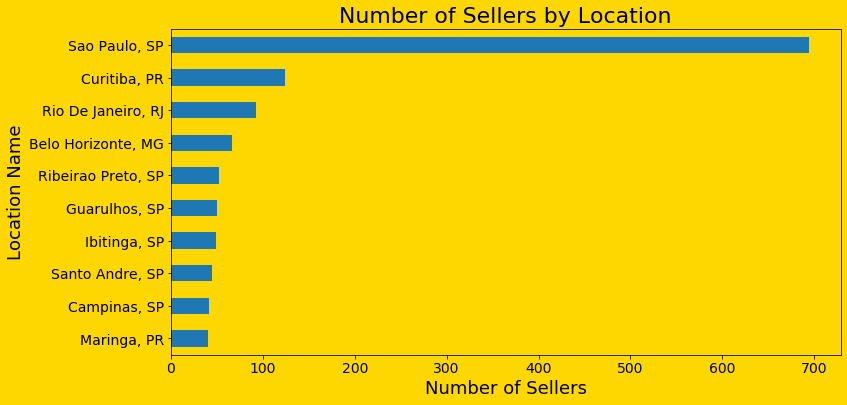

In [120]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_sell_city.plot(kind='barh')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Location Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Sellers by Location', fontsize=22)
plt.show()

In [121]:
sellers_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

14940    49
13660    10
16200     9
13920     9
01026     8
14020     8
87050     8
13481     7
37540     7
35530     6
Name: seller_zip_code_prefix, dtype: int64

In [122]:
top_10_zip = sellers_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10)

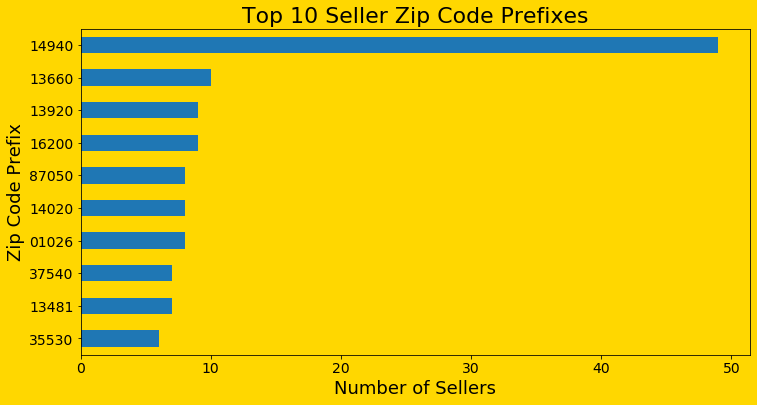

In [123]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_zip.plot(kind='barh')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Seller Zip Code Prefixes', fontsize=22)
plt.show()

### 3b) Orders Dataset

In [124]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [125]:
orders_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

2017-11    7544
2018-01    7269
2018-03    7211
2018-04    6939
2018-05    6873
2018-02    6728
2018-08    6512
2018-07    6292
2018-06    6167
2017-12    5673
Freq: M, Name: order_month_year, dtype: int64

In [126]:
top_10_orders = orders_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10)

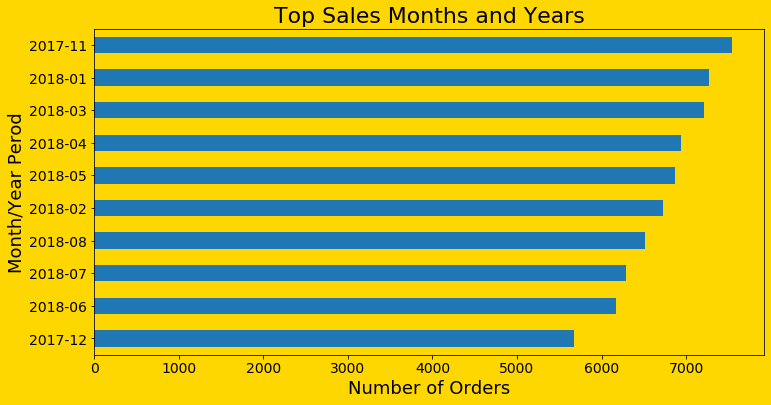

In [127]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_orders.plot(kind='barh')
plt.xlabel('Number of Orders', fontsize=18)
plt.ylabel('Month/Year Perod', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Sales Months and Years', fontsize=22)
plt.show()

### 3c) Items Dataset

In [128]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [129]:
items_df.set_index(['order_id'], inplace=True)
items_df

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


In [130]:
items_df['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [131]:
items_df['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [132]:
items_df['price'].value_counts(bins=[0,100,200,1000]).sort_values(ascending=False)

(-0.001, 100.0]    72337
(100.0, 200.0]     26939
(200.0, 1000.0]    12530
Name: price, dtype: int64

In [133]:
items_df['freight_value'].value_counts(bins=[0,100,200,1000]).sort_values(ascending=False)

(-0.001, 100.0]    111979
(100.0, 200.0]        601
(200.0, 1000.0]        70
Name: freight_value, dtype: int64

### 3d) Customers Dataset

In [134]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_city_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,"Franca, SP"
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,Sao Bernardo Do Campo,SP,"Sao Bernardo Do Campo, SP"
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,Sao Paulo,SP,"Sao Paulo, SP"
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,Mogi Das Cruzes,SP,"Mogi Das Cruzes, SP"
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,"Campinas, SP"


In [135]:
customers_df.shape

(99441, 6)

In [136]:
customers_df['customer_city_state'].value_counts().sort_values(ascending=
                                                                       True).tail(10).sort_values(ascending=False)

Sao Paulo, SP                15540
Rio De Janeiro, RJ            6882
Belo Horizonte, MG            2773
Brasilia, DF                  2131
Curitiba, PR                  1521
Campinas, SP                  1444
Porto Alegre, RS              1379
Salvador, BA                  1245
Guarulhos, SP                 1189
Sao Bernardo Do Campo, SP      938
Name: customer_city_state, dtype: int64

In [137]:
top_10_cust_citystate = customers_df['customer_city_state'].value_counts().sort_values(ascending=True).tail(10)

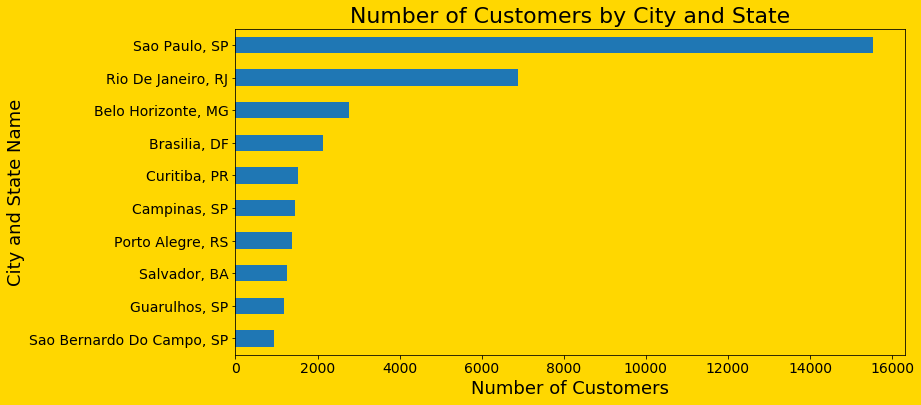

In [138]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_cust_citystate.plot(kind='barh')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('City and State Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Customers by City and State', fontsize=22)
plt.show()

In [139]:
customers_df['customer_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: customer_zip_code_prefix, dtype: int64

In [140]:
top_cust_zip = customers_df['customer_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10)

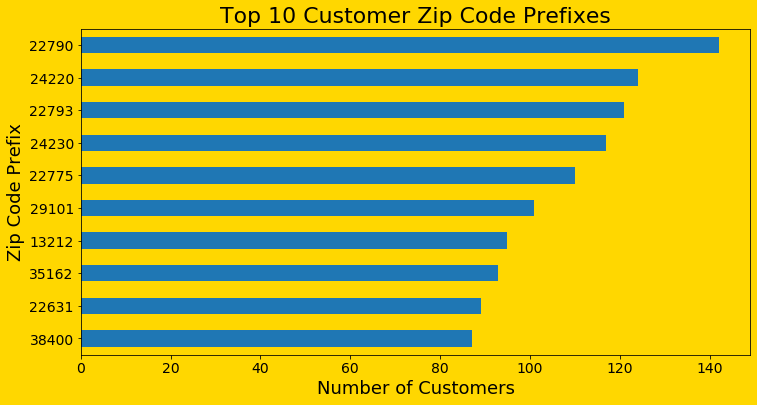

In [141]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_cust_zip.plot(kind='barh')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Customer Zip Code Prefixes', fontsize=22)
plt.show()

### 3e) Geolocation Dataset

In [142]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_city_state
0,01037,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
1,01046,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
2,01046,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
3,01041,-23.54,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
4,01035,-23.54,-46.64,Sao Paulo,SP,"Sao Paulo, SP"


In [143]:
geolocation_df.shape

(1000163, 6)

In [144]:
geolocation_df['geolocation_state'].value_counts().sort_values(ascending=
                                                                    True).tail(10).sort_values(ascending=False)

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
Name: geolocation_state, dtype: int64

In [145]:
top_geo_state = geolocation_df['geolocation_state'].value_counts().sort_values(ascending=True).tail(10)

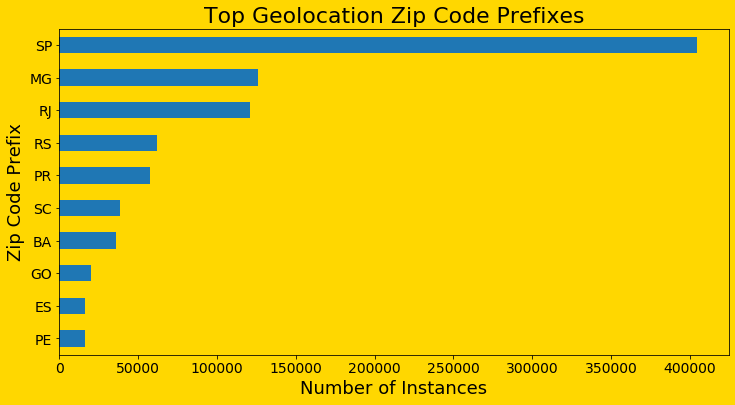

In [146]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_geo_state.plot(kind='barh')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Geolocation Zip Code Prefixes', fontsize=22)
plt.show()

In [147]:
geolocation_df['geolocation_zip_code_prefix'].value_counts().sort_values(ascending=
                                                                    True).tail(10).sort_values(ascending=False)

24220    1146
24230    1102
38400     965
35500     907
11680     879
22631     832
30140     810
11740     788
38408     773
28970     743
Name: geolocation_zip_code_prefix, dtype: int64

In [148]:
top_geo_zip = geolocation_df['geolocation_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10)

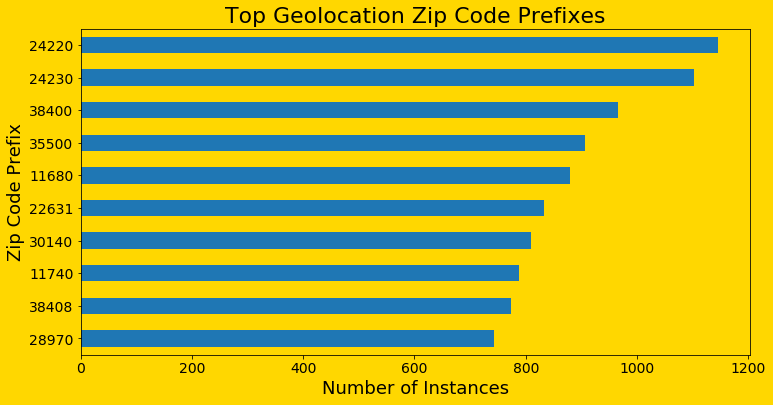

In [149]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_geo_zip.plot(kind='barh')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Geolocation Zip Code Prefixes', fontsize=22)
plt.show()

### 3e) Payments Dataset

In [150]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit_Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit_Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit_Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit_Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit_Card,2,128.45


In [151]:
payments_df['payment_value'].value_counts(bins=[0,100,200,1000,10000,1000000]).sort_values(ascending=False)

(-0.001, 100.0]         52110
(100.0, 200.0]          31669
(200.0, 1000.0]         18957
(1000.0, 10000.0]        1149
(10000.0, 1000000.0]        1
Name: payment_value, dtype: int64

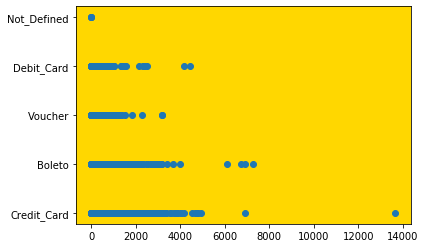

In [152]:
plt.scatter(payments_df['payment_value'], payments_df['payment_type'])

In [153]:
payments_df['payment_type'].value_counts().sort_values(ascending=False)

Credit_Card    76795
Boleto         19784
Voucher         5775
Debit_Card      1529
Not_Defined        3
Name: payment_type, dtype: int64

In [154]:
top_pay_type = payments_df['payment_type'].value_counts().sort_values(ascending=True)

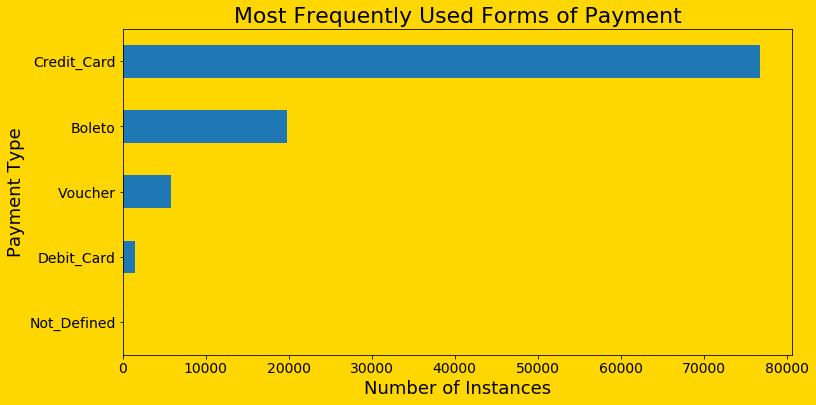

In [155]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_type.plot(kind='barh')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Payment Type', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Most Frequently Used Forms of Payment', fontsize=22)
plt.show()

### 3f) Reviews Dataset

In [156]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [157]:
reviews_df.review_score.value_counts().sort_values(ascending=False)

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

### 3g) Products Dataset 

In [158]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,Esporte_Lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,Utilidades_Domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [159]:
products_df['product_category_name'].unique()

array(['Perfumaria', 'Artes', 'Esporte_Lazer', 'Bebes',
       'Utilidades_Domesticas', 'Instrumentos_Musicais', 'Cool_Stuff',
       'Moveis_Decoracao', 'Eletrodomesticos', 'Brinquedos',
       'Cama_Mesa_Banho', 'Construcao_Ferramentas_Seguranca',
       'Informatica_Acessorios', 'Beleza_Saude', 'Malas_Acessorios',
       'Ferramentas_Jardim', 'Moveis_Escritorio', 'Automotivo',
       'Eletronicos', 'Fashion_Calcados', 'Telefonia', 'Papelaria',
       'Fashion_Bolsas_E_Acessorios', 'Pcs', 'Casa_Construcao',
       'Relogios_Presentes', 'Construcao_Ferramentas_Construcao',
       'Pet_Shop', 'Eletroportateis', 'Agro_Industria_E_Comercio', nan,
       'Moveis_Sala', 'Sinalizacao_E_Seguranca', 'Climatizacao',
       'Consoles_Games', 'Livros_Interesse_Geral',
       'Construcao_Ferramentas_Ferramentas',
       'Fashion_Underwear_E_Moda_Praia', 'Fashion_Roupa_Masculina',
       'Moveis_Cozinha_Area_De_Servico_Jantar_E_Jardim',
       'Industria_Comercio_E_Negocios', 'Telefonia_Fixa',
   

In [160]:
products_df['product_description_length'].describe()

count   32341.00
mean      771.50
std       635.12
min         4.00
25%       339.00
50%       595.00
75%       972.00
max      3992.00
Name: product_description_length, dtype: float64

In [161]:
products_df['product_name_length'].describe()

count   32341.00
mean       48.48
std        10.25
min         5.00
25%        42.00
50%        51.00
75%        57.00
max        76.00
Name: product_name_length, dtype: float64

In [162]:
# Make this real lol

vc = prod_cat_df['category_name_eng'].value_counts()
labels = vc.index

plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(prod_cat_df['category_name_eng'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', pctdistance=.8)
plt.title('Percentage of Games by Genre (All)', fontsize=22)
plt.show()

KeyError: 'category_name_eng'